In [ ]:
# Load modules:
import numpy as np
import pprint
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
import xarray as xr
import cmocean as cm
from scipy import interpolate

import matplotlib.path as mpath
import cartopy.crs as ccrs
import cartopy.feature as cft

import netCDF4
import os
from gsw import alpha, SA_from_SP, p_from_z, CT_from_pt, beta, sigma1 
%matplotlib inline
# from scipy.ndimage import gaussian_filter
# import scipy.interpolate
# from scipy import stats

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['lines.linewidth'] = 2.0
letlab = ['(a)','(b)','(c)','(d)','(e)','(f)','(g)','(h)',
          '(i)','(j)','(k)','(l)','(m)','(n)','(o)','(p)',
          '(q)','(r)','(s)','(t)','(u)','(v)','(w)','(x)','(y)','(z)']

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [ ]:
base = 'C://Users//holme//data//access-om2//1deg_jra55_ryf_red3DSK//'
os.listdir(base)

outputs = ['049','099','09','100']#['049','099','100','09']
outputs = ['099','100']

rho0 = 1035.0
Cp = 3992.10322329649;

# open WOA files:
dwoa = xr.open_dataset(base + 'woa13_ts_mom10.nc').rename({'GRID_X_T':'xt_ocean','GRID_Y_T':'yt_ocean','ZT':'st_ocean'})
dwoa.temp['long_name'] = 'temperature'
dwoa.salt['long_name'] = 'salinity'
# open case files:
# names = {'C0': 'C0: 600 constant','C1_3D': 'C1: Full 3D', 'C2_3D': 'C2: Full 3D *600/980', 'C5_3D': 'C5: Full 3D',
#         'C6_2D_MLT': 'C6: 2D MLT', 'C7_3D_MLT': 'C7: 3D MLT+modes','C8_3D_MLTS': 'C8: 3D MLT+S',
#         'C9_2D_600GS': 'C9: Control', 'C10_3D_VMD': 'C10: 600+modes','C11_2D_1200GS': 'C11: 1200','C12_2D_20': 'C12: 20'}
names = {'C5_3D': 'FULL','C6_2D_MLT': 'MLT2D', 'C7_3D_MLT': 'MLT3D',
         'C9_2D_600GS': 'CTRL','C11_2D_1200GS': 'HIGH',
         'C17': 'LOW',
#         'C12_2D_20': 'C12: 20',
         'C13': 'CTRL-GM','C14': 'FULL-GM',
         'C15': 'HIGH-GM','C16': 'LOW-GM',
#         'C5_3D_Rwarm': 'FULL RCP4.5', 'C6_2D_MLT_Rwarm': 'MLT2D RCP4.5','C7_3D_MLT_Rwarm': 'MLT3D RCP4.5',
#         'C9_2D_600GS_Rwarm': 'CTRL RCP4.5','C11_2D_1200GS_Rwarm': 'HIGH RCP4.5',
#        'C12_2D_20_Rwarm': 'C12 RCP4.5'
#         'C17_Rwarm': 'LOW RCP4.5'
        }
linest = {'C5_3D': '-','C6_2D_MLT': '-', 'C7_3D_MLT': '-',
         'C9_2D_600GS': '-','C11_2D_1200GS': '-','C12_2D_20': '-',
         'C17': '-',
         'C13': '--','C14': '--','C15': '--','C16': '--',
         'C5_3D_Rwarm': ':','C6_2D_MLT_Rwarm': ':', 'C7_3D_MLT_Rwarm': ':',
         'C9_2D_600GS_Rwarm': ':','C11_2D_1200GS_Rwarm': ':','C12_2D_20_Rwarm': ':',
         'C17_Rwarm': ':'
         }
cases = list(names.keys())
docn = {}
dmon = {}
dmon_mld = {}
dscl = {}
docn_tyt = {}
dice = {}
dwms = {}
# docn_diff = {}
# dmon_diff = {}
for output in outputs:
    for cname in cases:
        try:
            docn[cname] = xr.open_dataset(base + 'ocean.' + cname + '.out' + output + '.ncra.nc')
            docn[cname]['temp_woab'] = docn[cname].temp.isel(time=0)-273.15-dwoa.temp.isel(time=0)
            docn[cname]['salt_woab'] = docn[cname].salt.isel(time=0)-dwoa.salt.isel(time=0)
        except:
            pass
        try:
            dmon[cname] = xr.open_dataset(base + 'ocean_month.' + cname + '.out' + output + '.ncra.nc')
        except:
            pass
        try:
            dmon_mld[cname] = xr.open_dataset(base + 'ocean_month.mld_max.' + cname + '.out' + output + '.ncra.nc')
        except:
            pass
        try:
            dscl[cname] = xr.open_dataset(base + 'ocean_scalar.' + cname + '.out000-' + output + '.ncrcat.nc')
        except:
            pass
        try:
            docn_tyt[cname] = xr.open_dataset(base + 'ocean.ty_trans_rho.xsum.' + cname + '.out000-' + output + '.ncrcat.nc')
        except:
            pass
        try:
            dice[cname] = xr.open_dataset(base + 'iceh.' + cname + '.out' + output + '.ncra.ncrcat.nc')
        except:
            pass
        try:
            dwms[cname] = xr.open_dataset(base + 'ocean_wmass.' + cname + '.out' + output + '.ncra.nc')
        except:
            pass

# Set control simulation:
cont = 'C9_2D_600GS'    
docn['cont'] = docn[cont]
dmon['cont'] = dmon[cont]
try:
    dmon_mld['cont'] = dmon_mld[cont]
except:
    pass
try:
    docn_tyt['cont'] = docn_tyt[cont]
except:
    pass
try:
    dscl['cont'] = dscl[cont]
except:
    pass
try:
    dice['cont'] = dice[cont]
except:
    pass
try:
    dwms['cont'] = dwms[cont]
except:
    pass
try:
    names['cont'] = names[cont]
except:
    pass

# Read in masks:
dmask = xr.open_dataset(base + 'basin_mask.nc').rename({'XT_OCEAN':'xt_ocean','YT_OCEAN':'yt_ocean'})
dmask.coords['xt_ocean'] = docn['cont'].temp.xt_ocean.values
dmask.coords['yt_ocean'] = docn['cont'].temp.yt_ocean.values
mask = dmask.BASIN_MASK.isel(ST_OCEAN1_1=0)
land_mask = ~mask.isnull()
mask_indpac_t = (land_mask.where(np.logical_or(mask==5,np.logical_or(mask==3,mask==10)))).fillna(0.)
mask_atl_t = (land_mask.where(np.logical_or(mask==2,np.logical_or(mask==6,np.logical_or(mask==8,np.logical_or(mask==7,np.logical_or(mask==4,mask==9))))))).fillna(0.)
mask_so_t = (land_mask.where(mask==1)).fillna(0.)

mask_indpac_ut = mask_indpac_t.rename({'yt_ocean':'yu_ocean'})
mask_indpac_ut.coords['yu_ocean'] = dmon['cont'].yu_ocean.values
mask_atl_ut = mask_atl_t.rename({'yt_ocean':'yu_ocean'})
mask_atl_ut.coords['yu_ocean'] = dmon['cont'].yu_ocean.values
mask_so_ut = mask_so_t.rename({'yt_ocean':'yu_ocean'})
mask_so_ut.coords['yu_ocean'] = dmon['cont'].yu_ocean.values

# Grid file:
ocn_grd = xr.open_dataset(base + 'ocean_grid.nc')

Text(0.5, 0, 'Potential density $\\sigma_2$ (kgm$^{-3}$)')

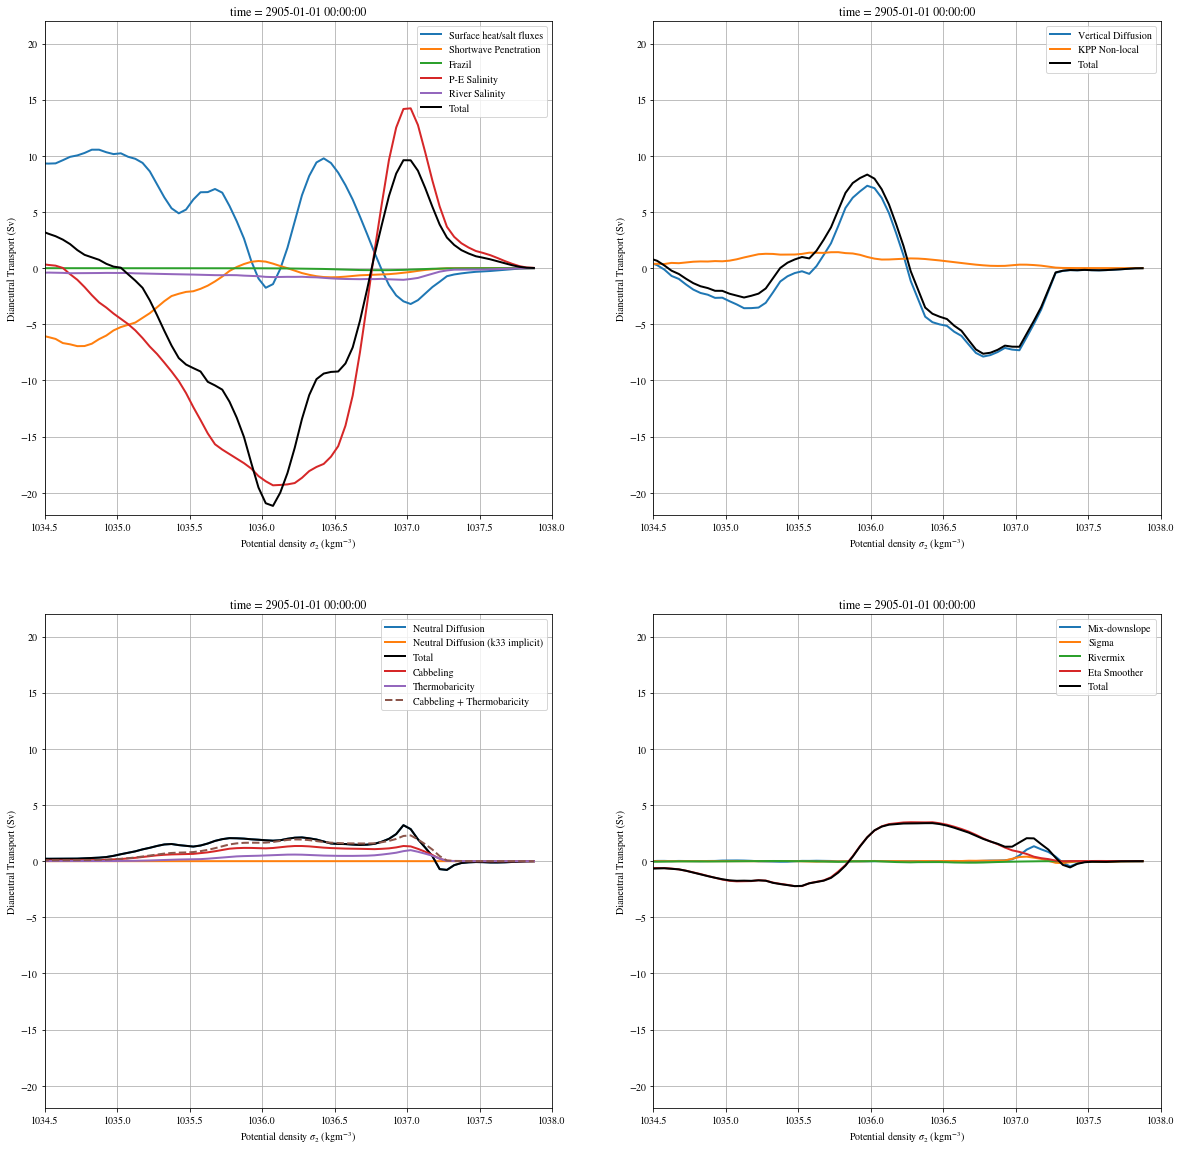

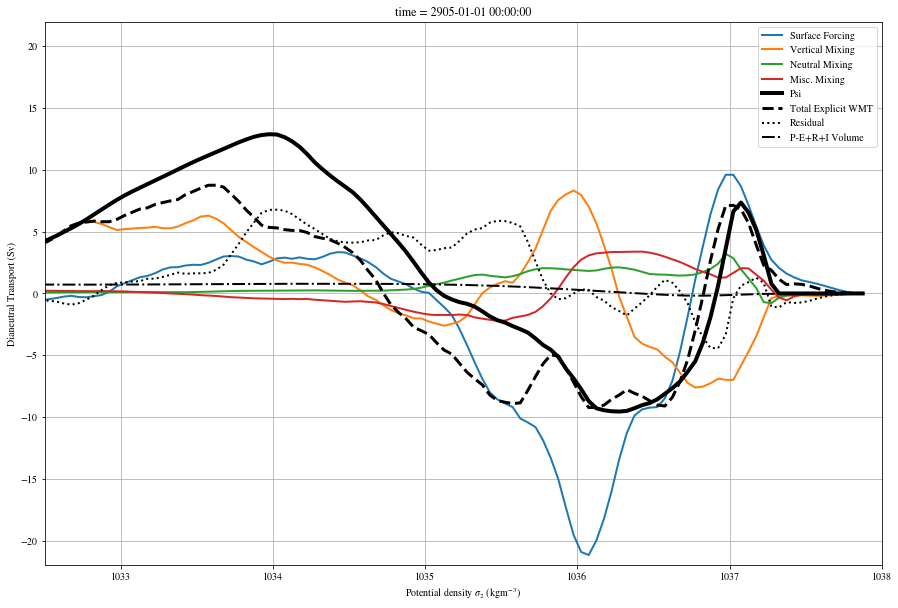

In [44]:
# Checks on control run:
sol = 'cont'

max_lat = -30.
dwms_sum = dwms[sol].isel(time=0).sel(grid_yt_ocean=slice(-90.,max_lat)).sum('grid_yt_ocean').sum('grid_xt_ocean')

both_terms = ['sbc','sw','frazil','pbl_pme_kn','pbl_pme_pr','pbl_rv_kn','pbl_rv_pr', 
              'diff_cbt','kpp_nloc',
              'mixdown','sigma','rivermix','smooth',
              'ndiff','k33']
tform_terms = ['cabbel','thermb']
wdian_terms = ['cabbeling','thermob']

all_terms = both_terms + tform_terms

combs = {'SF': ['sbc','sw','frazil','pbl_pme_pr','pbl_rv_pr'],
         'VM': ['diff_cbt','kpp_nloc'],
         'NM': ['ndiff','k33'],
         'MM': ['mixdown','sigma','rivermix','smooth']}
cnames = {'SF':'Surface Forcing','VM':'Vertical Mixing','NM':'Neutral Mixing','MM':'Misc. Mixing',
         'sbc':'Surface heat/salt fluxes','frazil':'Frazil','pbl_pme_pr':'P-E Salinity','pbl_rv_pr':'River Salinity','sw':'Shortwave Penetration',
         'diff_cbt':'Vertical Diffusion','kpp_nloc':'KPP Non-local','ndiff':'Neutral Diffusion','k33':'Neutral Diffusion (k33 implicit)',
         'mixdown':'Mix-downslope','sigma':'Sigma','rivermix':'Rivermix','smooth':'Eta Smoother'}

nfilt = 5

# Load raw terms:
tform = {}
wdian = {}
wd_conv = 8*rho0
for vi in both_terms:
    tform[vi] = dwms_sum['tform_rho_' + vi + '_on_nrho']/rho0/1.e6
    wdian[vi] = dwms_sum['wdian_rho_' + vi + '_on_nrho']/rho0/1.e6*wd_conv
for vi in tform_terms:
    tform[vi] = dwms_sum['tform_rho_' + vi + '_on_nrho']/rho0/1.e6
for i, vi in enumerate(wdian_terms):
    wdian[tform_terms[i]] = dwms_sum['wdian_rho_' + vi + '_on_nrho']/rho0/1.e6*wd_conv

psi = (docn[sol].ty_trans_rho.isel(time=0).sel(grid_yu_ocean=max_lat,method='nearest').sum('grid_xt_ocean')[::-1].cumsum('potrho')[::-1]-docn[sol].ty_trans_rho_gm.isel(time=0).sel(grid_yu_ocean=max_lat,method='nearest').sum('grid_xt_ocean'))/rho0/1.e6
psi = psi.rename({'potrho':'neutral'})

JS = (dwms[sol].mass_pmepr_on_nrho.isel(time=0).sel(grid_yt_ocean=slice(-90.,max_lat)).sum('grid_yt_ocean').sum('grid_xt_ocean')[::-1].cumsum('neutral')[::-1])/rho0/1.e6

# Load combinations:
for vi in combs.keys():
    for i, vii in enumerate(combs[vi]):
        if i==0:
            tform[vi] = tform[vii]
            wdian[vi] = wdian[vii]
        else:
            tform[vi] = tform[vi]+tform[vii]
            wdian[vi] = wdian[vi]+wdian[vii]

tform['WMT'] = tform['SF']+tform['VM']+tform['MM']+tform['NM']
tform['RES'] = psi - tform['WMT'] - JS

# All explicit terms:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(20,20))
axs = axes.reshape(-1)

# Surface forcing:
for i, vi in enumerate(combs['SF']):
    tform[vi].rolling(neutral=nfilt, center=True).mean().plot(ax=axs[0],label=cnames[vi],color='C'+str(i))
tform['SF'].rolling(neutral=nfilt, center=True).mean().plot(ax=axs[0],label='Total',color='k')

# Vertical Mixing:
for i, vi in enumerate(combs['VM']):
    tform[vi].rolling(neutral=nfilt, center=True).mean().plot(ax=axs[1],label=cnames[vi],color='C'+str(i))
tform['VM'].rolling(neutral=nfilt, center=True).mean().plot(ax=axs[1],label='Total',color='k')

# Neutral Mixing:
for i, vi in enumerate(combs['NM']):
    tform[vi].rolling(neutral=nfilt, center=True).mean().plot(ax=axs[2],label=cnames[vi],color='C'+str(i))
tform['NM'].rolling(neutral=nfilt, center=True).mean().plot(ax=axs[2],label='Total',color='k')
tform['cabbel'].rolling(neutral=nfilt, center=True).mean().plot(ax=axs[2],label='Cabbeling',color='C3')
tform['thermb'].rolling(neutral=nfilt, center=True).mean().plot(ax=axs[2],label='Thermobaricity',color='C4')
(tform['cabbel']+tform['thermb']).rolling(neutral=nfilt, center=True).mean().plot(ax=axs[2],label='Cabbeling + Thermobaricity',color='C5',linestyle='--')

# Misc Mixing:
for i, vi in enumerate(combs['MM']):
    tform[vi].rolling(neutral=nfilt, center=True).mean().plot(ax=axs[3],label=cnames[vi],color='C'+str(i))
tform['MM'].rolling(neutral=nfilt, center=True).mean().plot(ax=axs[3],label='Total',color='k')

axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
for ax in axs:
    ax.set_xlim([1034.5,1038.])
    ax.set_ylim([-22.,22.])
    ax.grid()
    ax.set_ylabel('Dianeutral Transport (Sv)')
    ax.set_xlabel('Potential density $\sigma_2$ (kgm$^{-3}$)')

# Combinations and residuals:
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(15,10))

for vi in combs.keys():
    tform[vi].rolling(neutral=nfilt, center=True).mean().plot(ax=axes,label=cnames[vi])
psi.rolling(neutral=nfilt,center=True).mean().plot(ax=axes,label='Psi',linewidth=4,color='k')
tform['WMT'].rolling(neutral=nfilt,center=True).mean().plot(ax=axes,label='Total Explicit WMT',linestyle='--',color='k',linewidth=3)
tform['RES'].rolling(neutral=nfilt,center=True).mean().plot(ax=axes,label='Residual',linestyle=':',color='k') 
JS.rolling(neutral=nfilt,center=True).mean().plot(ax=axes,label='P-E+R+I Volume',color='k',linestyle='-.')
axes.legend()
axes.set_xlim([1032.5,1038.])
axes.set_ylim([-22.,22.])
axes.grid()
axes.set_ylabel('Dianeutral Transport (Sv)')
axes.set_xlabel('Potential density $\sigma_2$ (kgm$^{-3}$)')

## Known issues with WMT calculations

1. Need to calculate tendency from restart file snapshots - may play a role in the bottom waters.

2. half $\sigma_2$ grid cell offset between $\Psi$, $J_S$ and the transformation terms.

3. We are binning tendencies for locally-reference potential density into $\sigma_2$ coordinates. $\sigma_2$ *is not strictly neutral* (except at $2000$m). Therefore we would expect not to get quite the right dianeutral transport. The variations of $\sigma_2$ along neutral density surfaces reach amplitudes up to about $0.14$kgm$^{-3}$ (Trevor). So the errors might not be that large. However, these errors are likely systematic (not random) and so it's not really clear. One approach would be to implement Geoff's $\omega$+ surfaces in MOM5. Another is to test sensitivity to binning in $\sigma_1$, $\sigma_3$ etc.

4. Numerical binning issues discussed in Griffies (2005). E.g. `tform` vs. `wdian` diagnostics and `pr` vs. `kn` diagnostics. These seem to give me consistent results - except that the `wdian` are off by a constant factor of either $8\rho_0$ or $20\rho_0$ (depending on the variable). Need to read Griffies (2005) in more detail.

5. Why does the $\eta$-smoother have such a large impact? Low-resolution smoothing across the ACC?

6. What is going on with the neutral diffusion term? What is in this other than Cabbeling and Thermobaricity? In particular, what is causing the negative transformation at dense values - problems with neutral slopes??

7. We expect numerical mixing to be large - so given the above errors, how can we establish what it is?